In [1]:
import quandl
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
import statsmodels.api as m
import seaborn as sns
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
df = quandl.get("NSE/IBULISL")

In [4]:
df.head()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-06-08,561.0,561.00,531.00,542.0,539.20,22729.0,122.36
2018-06-11,515.0,548.00,512.25,525.0,524.85,60741.0,317.60
2018-06-12,498.7,534.00,498.70,525.0,525.05,38802.0,204.62
2018-06-13,515.0,545.00,515.00,540.0,540.50,34213.0,184.40
2018-06-14,545.0,564.95,541.50,545.0,549.25,49978.0,276.60


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 142 entries, 2018-06-08 to 2019-01-04
Data columns (total 7 columns):
Open                    142 non-null float64
High                    142 non-null float64
Low                     142 non-null float64
Last                    142 non-null float64
Close                   142 non-null float64
Total Trade Quantity    142 non-null float64
Turnover (Lacs)         142 non-null float64
dtypes: float64(7)
memory usage: 8.9 KB


In [6]:
df.columns

Index(['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [7]:
df = df[['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity','Turnover (Lacs)']]

In [8]:
df['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0

In [9]:
df['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [10]:
df = df[['Close','HL_PCT','PCT_change', 'Turnover (Lacs)']]

In [11]:
df.head()

,Close,HL_PCT,PCT_change,Turnover (Lacs)
Date,,,,
2018-06-08,539.20,5.563798,-3.885918,122.36
2018-06-11,524.85,6.811470,1.912621,317.60
2018-06-12,525.05,6.723169,5.283738,204.62
2018-06-13,540.50,5.550416,4.951456,184.40
2018-06-14,549.25,4.269458,0.779817,276.60


In [12]:
y = df['Close']

In [13]:
y

Date
2018-06-08    539.20
2018-06-11    524.85
2018-06-12    525.05
2018-06-13    540.50
2018-06-14    549.25
2018-06-15    528.60
2018-06-18    503.45
2018-06-19    478.95
2018-06-20    502.85
2018-06-21    527.95
2018-06-22    530.90
2018-06-25    511.15
2018-06-26    500.40
2018-06-27    484.95
2018-06-28    470.80
2018-06-29    485.90
2018-07-02    464.60
2018-07-03    460.25
2018-07-04    451.40
2018-07-05    435.50
2018-07-06    450.85
2018-07-09    471.05
2018-07-10    463.95
2018-07-11    449.45
2018-07-12    447.75
2018-07-13    438.10
2018-07-16    422.85
2018-07-17    428.10
2018-07-18    427.80
2018-07-19    424.35
               ...  
2018-11-22    318.60
2018-11-26    304.20
2018-11-27    293.20
2018-11-28    278.55
2018-11-29    292.45
2018-11-30    307.05
2018-12-03    312.55
2018-12-04    310.35
2018-12-05    294.85
2018-12-06    280.25
2018-12-07    268.60
2018-12-10    255.20
2018-12-11    267.95
2018-12-12    281.30
2018-12-13    295.35
2018-12-14    310.10
2018-12-

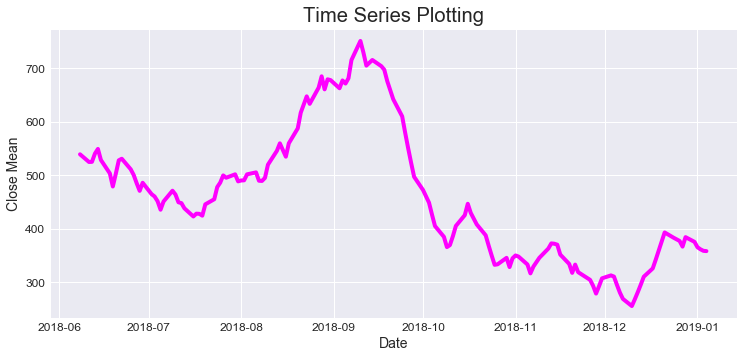

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(11, 5))
plt.plot(y, c='magenta')
plt.title("Time Series Plotting")
plt.xlabel("Date")
plt.ylabel("Close Mean")
plt.show()

In [15]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1825.5642500093663
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1424.6542627989804
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1572.4536327651017
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1557.7866146060471
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1439.1803283237932
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1426.1386852944668
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1937.636774751537
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1642.285096061386
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1394.7934101756189
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1268.9967528121197
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1410.579367057972
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1394.7573562762323
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1293.226044925526
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1271.4825831357828
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1092.6734726573518
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1019.4302062705
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1099.8079230766157
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1092.458002714641


In [17]:
#take minimum AIC value ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:986.0070423355573
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1]) 

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6584      0.131      5.044      0.000       0.403       0.914
ma.L1         -0.2516      0.163     -1.540      0.124      -0.572       0.069
ma.S.L12      -1.0000   1594.294     -0.001      0.999   -3125.758    3123.758
sigma2       241.3106   3.85e+05      0.001      0.999   -7.54e+05    7.54e+05


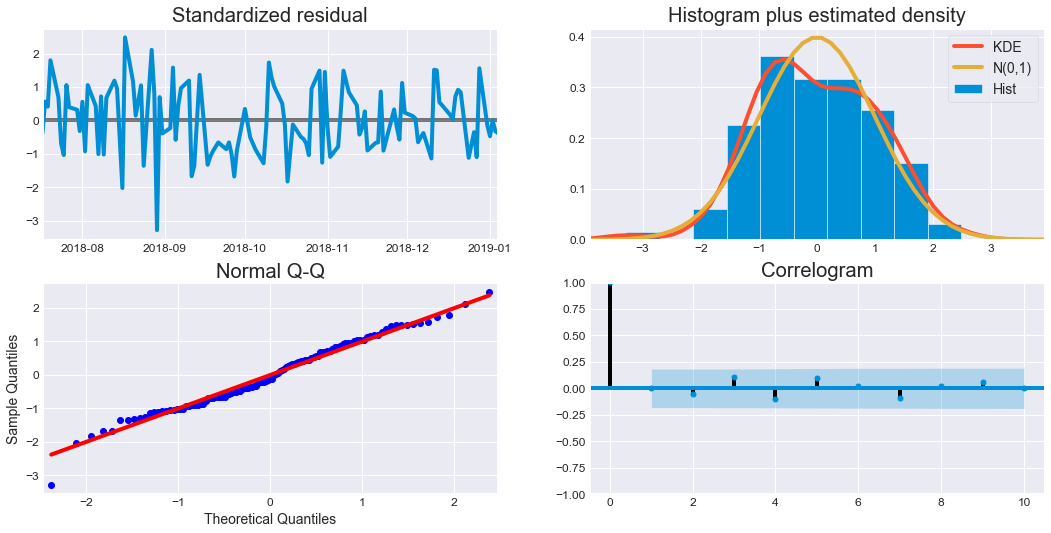

In [18]:
results.plot_diagnostics(figsize=(16, 8))
plt.show() 

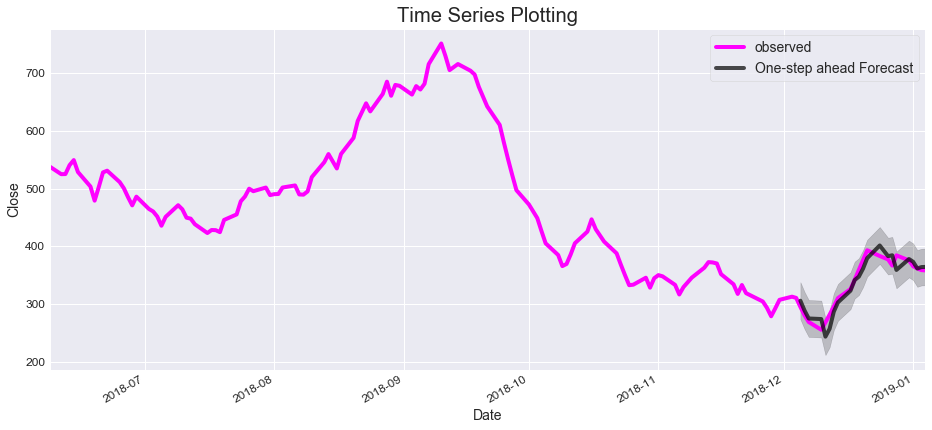

In [19]:
pred = results.get_prediction(start=pd.to_datetime('2018-12-05'), 
                              dynamic=False)
pred_ci = pred.conf_int()
ax = y['2018':].plot(label='observed', c='magenta')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', 
                         c= 'k',alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.title("Time Series Plotting")
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

In [20]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-12-05':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 177.88


In [21]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round
                                                                  (np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 13.34


In [28]:
pred_uc = 
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7) , c = 'magenta')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', c = 'k' )
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

TypeError: unsupported operand type(s) for *: 'int' and 'NoneType'